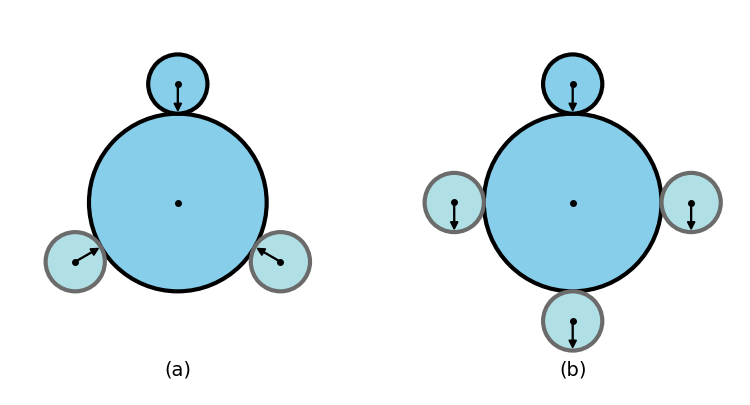

In [2]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, FancyArrow
import numpy as np

def draw_coin(ax, center, radius, facecolor='#87CEEB', edgecolor='black',
              arm_angle=None, arm_len=None, armcolor='black', lw=3):
    """Draw a coin with an optional orientation arrow."""
    circ = Circle(center, radius, facecolor=facecolor, edgecolor=edgecolor, lw=lw)
    ax.add_patch(circ)
    # center dot
    ax.plot(center[0], center[1], 'o', color='black', ms=4)
    # orientation arrow
    if arm_angle is not None:
        if arm_len is None:
            arm_len = radius * 0.9
        x0, y0 = center
        x1 = x0 + arm_len * np.cos(arm_angle)
        y1 = y0 + arm_len * np.sin(arm_angle)
        arr = FancyArrow(x0, y0, x1 - x0, y1 - y0,
                         width=0.03*radius, head_width=0.25*radius, head_length=0.25*radius,
                         color=armcolor, length_includes_head=True)
        ax.add_patch(arr)

def tangent_center(big_c, R, r, angle):
    """Center of a small circle tangent to the big circle at polar angle 'angle'."""
    return (big_c[0] + (R + r) * np.cos(angle),
            big_c[1] + (R + r) * np.sin(angle))

def draw_scene(ax, big_center, R, r, mode='left',
               big_color='#87CEEB', small_color='#B0E0E6'):
    """Draw one panel (left or right)."""
    # Big coin
    draw_coin(ax, big_center, R, facecolor=big_color, lw=3)

    # Top small coin (tangent at 90°) with downward arrow
    top_c = tangent_center(big_center, R, r, np.pi/2)
    draw_coin(ax, top_c, r, facecolor=big_color, lw=3, arm_angle=-np.pi/2)

    if mode == 'left':
        # Two tangent small coins at 210° and 330° with angled arrows
        c1 = tangent_center(big_center, R, r, np.deg2rad(210))
        c2 = tangent_center(big_center, R, r, np.deg2rad(330))
        draw_coin(ax, c1, r, facecolor=small_color, edgecolor='#6b6b6b',
                  arm_angle=np.deg2rad(30))
        draw_coin(ax, c2, r, facecolor=small_color, edgecolor='#6b6b6b',
                  arm_angle=np.deg2rad(150))
    else:
        # Three tangent coins: left (180°), right (0°), bottom (270°)
        left_c   = tangent_center(big_center, R, r, np.pi)
        right_c  = tangent_center(big_center, R, r, 0.0)
        bottom_c = tangent_center(big_center, R, r, -np.pi/2)

        # Left & right coins: arrows up
        draw_coin(ax, left_c,  r, facecolor=small_color, edgecolor='#6b6b6b',
                  arm_angle=-np.pi/2)
        draw_coin(ax, right_c, r, facecolor=small_color, edgecolor='#6b6b6b',
                  arm_angle=-np.pi/2)

        # Bottom coin: arrow DOWN (fixed)
        draw_coin(ax, bottom_c, r, facecolor=small_color, edgecolor='#6b6b6b',
                  arm_angle=-np.pi/2)

def print_image(r=0.6, k=3, center_distance=8.0, save_path=None):
    """Render the two panels and optionally save to file."""
    R = k * r  # enforce R = k r

    fig, ax = plt.subplots(figsize=(10, 5))
    left_center  = (-center_distance/2, 0.0)
    right_center = ( center_distance/2, 0.0)

    draw_scene(ax, left_center,  R, r, mode='left')
    draw_scene(ax, right_center, R, r, mode='right')

    # Labels (a) and (b) under each panel
    y_label = - (R + r) - 0.8
    ax.text(left_center[0],  y_label, '(a)', fontsize=14, ha='center', va='top')
    ax.text(right_center[0], y_label, '(b)', fontsize=14, ha='center', va='top')

    # Layout
    extent = center_distance/2 + (R + r) + 1.0
    ax.set_xlim(-extent, extent)
    ax.set_ylim(- (R + r) - 1.5, (R + r) + 1.5)
    ax.set_aspect('equal', adjustable='box')
    ax.axis('off')

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

# Example
print_image(r=0.6, k=3, center_distance=8.0, save_path="fig6.png")
